### Практическое задание к уроку № 2 по теме "Дискретные случайные величины.  
### Закон распределения вероятностей. Биномиальный закон распределения.  
### Распределение Пуассона."


#### Задачи 1 и 2.  
*Контрольная работа состоит из пяти вопросов. На каждый вопрос  
приведено четыре варианта ответа, один из которых правильный.  
Случайная величина X задаёт число правильных ответов при простом  
угадывании. Найдите математическое ожидание данной случайной  
величины. Найдите дисперсию случайной величины X.*  

In [1]:
%matplotlib inline
# %config InlineBackend.figure_format='svg'

import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

У нас 6 возможных исходов:  
мы не отвечаем ни на один вопрос, на ровно один, на ровно два и т.д. до ровно пяти:

<img src="https://latex.codecogs.com/svg.image?X_1&space;=&space;0,&space;X_2&space;=&space;1,&space;X_3&space;=&space;2,&space;X_4&space;=&space;3,&space;X_5&space;=&space;4,&space;X_6&space;=&space;5" title="X_1 = 0, X_2 = 1, X_3 = 2, X_4 = 3, X_5 = 4, X_6 = 5" />

Так как в решении нам понадобится формула Бернулли, то  
определим функции расчёта сочетаний и самой формулы:

In [2]:
def combinations(k, n):
    return np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n-k))

In [3]:
def bernoulli(k, n, p):
    return combinations(k, n) * p**k * (1-p)**(n-k)

В нашем примере число вопросов в контрольной - 5, а вероятность угадать ответ  
на каждый вопрос в отдельности равна 0,25. Значит, n=5, p=0.25.

In [4]:
n = 5
p = 0.25

Тогда, вероятность не ответить правильно ни на один вопрос равна:

In [5]:
P_0 = bernoulli(0, n, p)
P_0

0.2373046875

Вероятность ответить правильно ровно на 1 вопрос:

In [6]:
P_1 = bernoulli(1, n, p)
P_1

0.3955078125

Далее расчеты вероятности для других "иксов":

In [7]:
P_2 = bernoulli(2, n, p)
P_2

0.263671875

In [8]:
P_3 = bernoulli(3, n, p)
P_3

0.087890625

In [9]:
P_4 = bernoulli(4, n, p)
P_4

0.0146484375

In [10]:
P_5 = bernoulli(5, n, p)
P_5

0.0009765625

Построим график распределения случайной величины Х:

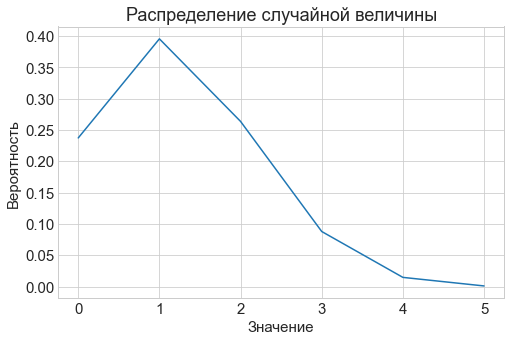

In [11]:
x = range(0, 6)
y = (P_0, P_1, P_2, P_3, P_4, P_5)

rcParams['font.size'] = 15
rcParams['figure.figsize'] = 8, 5
plt.style.use('seaborn-whitegrid')
plt.plot(x, y)
plt.title('Распределение случайной величины')
plt.xlabel('Значение')
plt.ylabel('Вероятность')

plt.show()

Математическое ожидание случайной величины:

In [12]:
M_x = n * p
M_x

1.25

Т.е. в среднем, мы будем правильно отвечать на 1,25 вопросов из 5.  
Дисперсия:

In [13]:
D_x = n * p * (1 - p)
D_x

0.9375

#### Задача 3.  
*Пользователь получает в среднем 10 писем со спамом на свой почтовый ящик за  
сутки. Найти число N, такое, что с вероятностью 0.95 пользователь получит не  
более N писем со спамом за текущий день.*

Это задача на распределение Пуассона, где λ=10.  
Перефразируя условие, нам нужно найти N из уравнения:  
<img src="https://latex.codecogs.com/svg.image?P(X&space;\le&space;N)&space;=&space;\sum_{i=0}^N\dfrac{10^N&space;\cdot&space;e^{-10}}{N!}&space;=&space;0.95" title="P(X \le N) = \sum_{i=0}^N\dfrac{10^N \cdot e^{-10}}{N!} = 0.95" />

Обозначим функцию для расчёта этой формулы:

In [14]:
def poisson(N):
    return 10**N * np.exp(-10) / np.math.factorial(N)

Построим диаграмму распределения случайной величины:

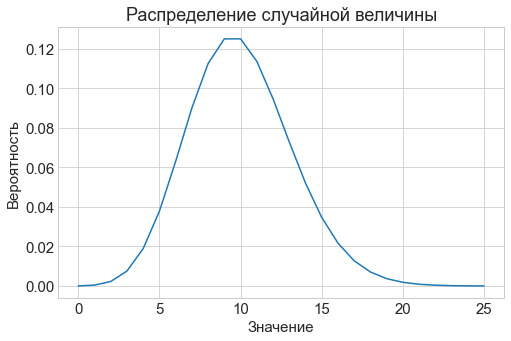

In [15]:
x = range(26)
y = list(poisson(i) for i in x)

plt.plot(x, y)
plt.title('Распределение случайной величины')
plt.xlabel('Значение')
plt.ylabel('Вероятность')

plt.show()

Напишем код для поиска N:

In [16]:
N = -1
sum_ = 0

while sum_ < 0.95:
    sum_ = 0
    N += 1
    for i in range(N + 1):
        sum_ += poisson(i)

In [17]:
N

15

Посмотрим, чему равна вероятность получить не более 15 писем  
со спамом в день:

In [18]:
P = sum(poisson(i) for i in range(16))
P

0.9512595966960214

Расчёт был выполнен верно. Таким образом, правильный ответ: <u>N = 15</u>

#### Задача 4.
*Производятся выстрелы по мишени. Вероятность попадания в мишень при одном  
выстреле равна 0.01. Сколько выстрелов нужно сделать чтобы быть уверенным  
с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание?*  



Задача похожа на предыдущую, только здесь биномиальное распределение,  
поэтому будем пользоваться формулой Бернулли.  
Нам дано p=0.01, k=6.

Нас устроят все варианты, когда число попаданий не равно 0,1,2,3,4,5.  
Поэтому эти варианты будем вычитать из 1. В итоге, нужно найти минимальное  
значение n, чтобы выполнялось неравенство:

<img src="https://latex.codecogs.com/svg.image?1&space;-&space;\sum_{k=0}^5&space;(C_n^k&space;\cdot&space;0.01^k&space;\cdot&space;(1-0.01)^{n-k})&space;\ge&space;0.9" title="1 - \sum_{k=0}^5 (C_n^k \cdot 0.01^k \cdot (1-0.01)^{n-k}) \ge 0.9" />  


Очевидно, что выстрелов должно быть не менее 6, поэтому n будем  
отсчитывать с 6.

In [19]:
n = 5
sum_ = 1

while (1 - sum_) < 0.9:
    sum_ = 0
    n += 1
    for k in range(6):
        sum_ += bernoulli(k=k, n=n, p=0.01)

In [20]:
n

926

Посчитаем вероятность попасть в мишень как минимум 6 раз при 926 выстрелах:

In [21]:
P = 1 - sum(bernoulli(k=i, n=926, p=0.01) for i in range(6))
P

0.9003627121531355

Расчёт был выполнен верно. Таким образом, правильный ответ: <u>n = 926</u>